In [1]:
%load_ext autoreload
%load_ext Cython
%autoreload 2
import mc.pocket as pocket
%aimport mc.pocket
import numpy as np
import random
import matplotlib.pyplot as plt

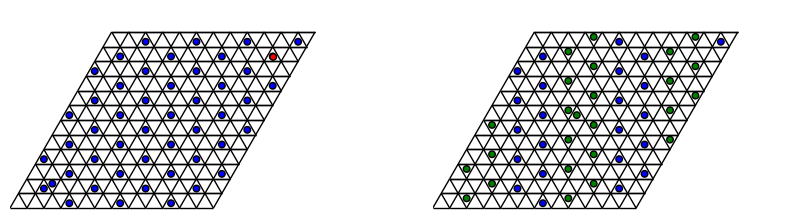

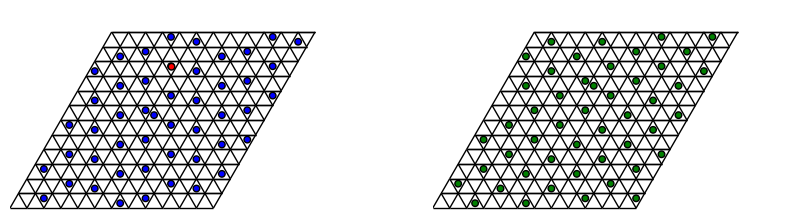

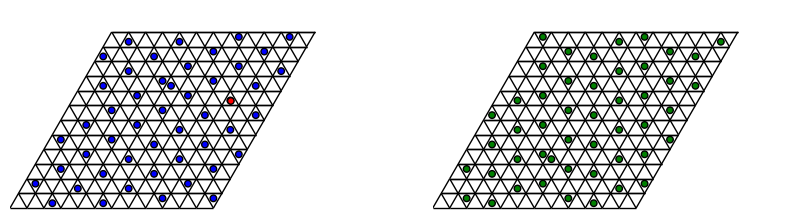

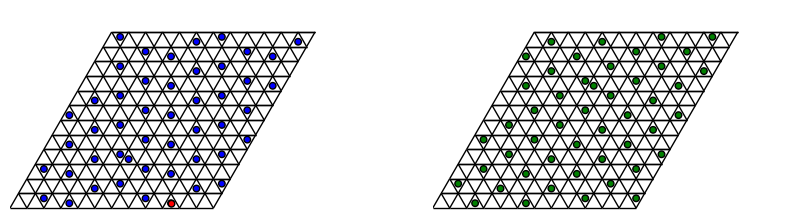

In [10]:

pocket.width, pocket.height = 12, 12

pos = []
for i in range(0, pocket.height, 3):
    for j in range(0, pocket.width, 3):
        pos.append((i, j, 0))
        pos.append((i+1, j+1, 0))
        pos.append((i+2, j+2, 0))
pos.remove((0, 0, 0))
pos.append((1, 1, 1))

sample = (pos, pocket.gen_occ(pos))

fig, ax = plt.subplots(1, 2, figsize=[10, 4])
sample, _ = pocket.pocket_move(sample, axes=ax)
fig, ax = plt.subplots(1, 2, figsize=[10, 4])
sample, _ = pocket.pocket_move(sample, axes=ax)

seed = random.choice(sample[0])
sym = pocket.rand_symmetry()

fig, ax = plt.subplots(1, 2, figsize=[10, 4])
sample, _ = pocket.pocket_move(sample, axes=ax, seed=seed, sym=sym)
fig, ax = plt.subplots(1, 2, figsize=[10, 4])
sample, _ = pocket.pocket_move(sample, axes=ax, seed=pocket.apply_symmetry(sym, seed), sym=sym)



[0, 14, 14]


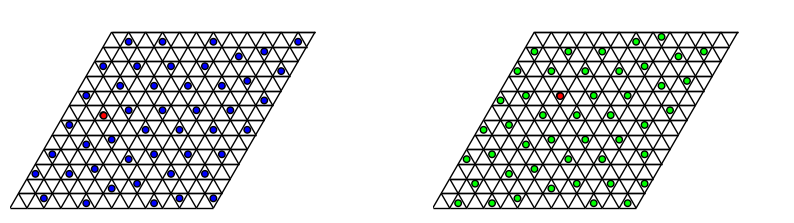

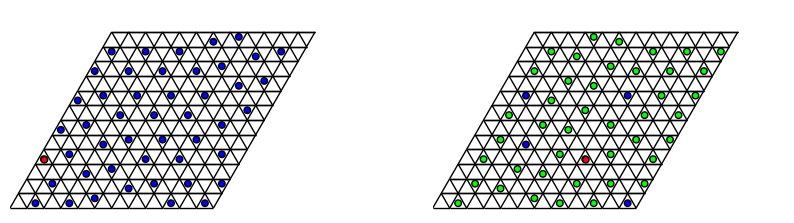

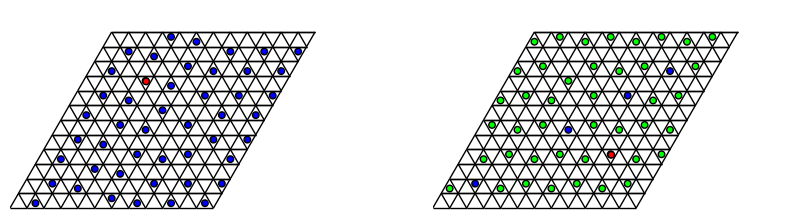

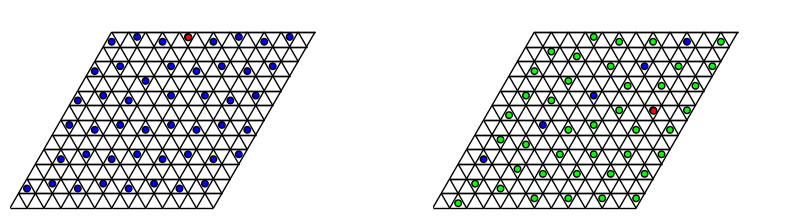

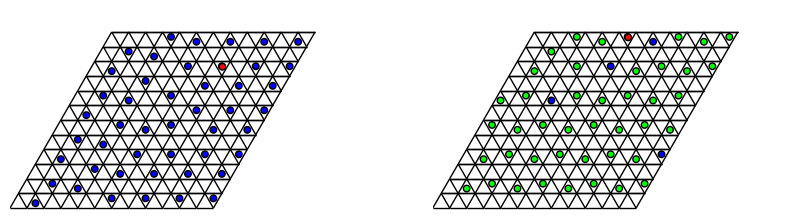

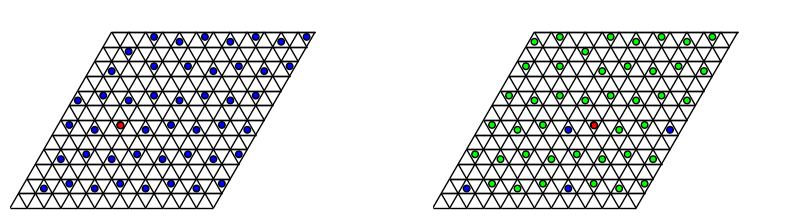

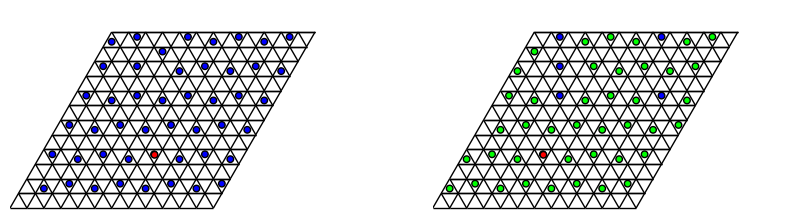

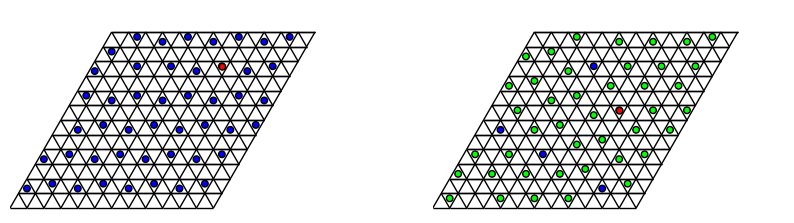

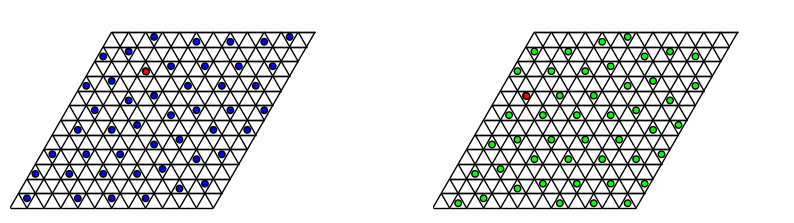

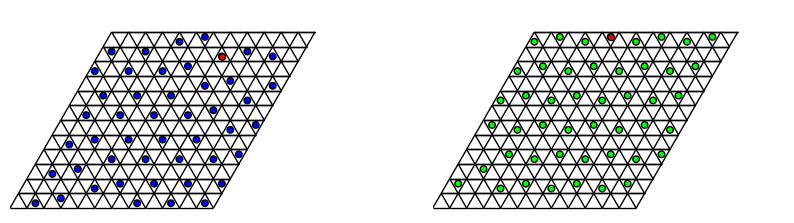

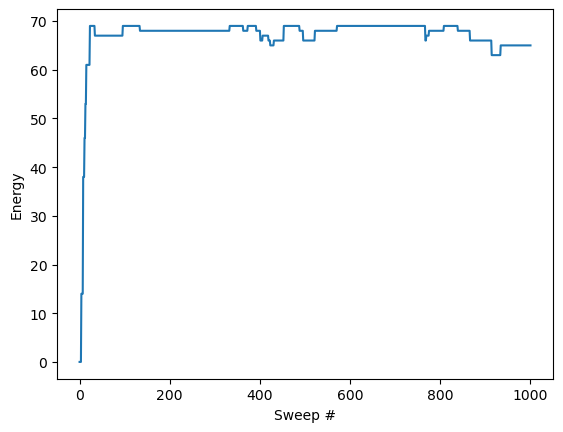

In [22]:
pocket.width, pocket.height = 12, 12

pos = []
for i in range(0, pocket.height, 3):
    for j in range(0, pocket.width, 3):
        pos.append((i, j, 0))
        pos.append((i+1, j+1, 0))
        pos.append((i+2, j+2, 0))
pos.remove((0, 0, 0))

sample = (pos, pocket.gen_occ(pos))

random.seed(0)

energies = []
energies.append(pocket.j4_energy(sample))
for i in range(1000):
    if 910 > i >= 900:
        fig, ax = plt.subplots(1, 2, figsize=[10, 4])
        sample, _ = pocket.pocket_move(sample, axes=ax, j4_parameter=-1)
    else:
        sample, _ = pocket.pocket_move(sample, j4_parameter=-1)
    energies.append(pocket.j4_energy(sample))

plt.figure()
plt.plot(energies)
plt.xlabel("Sweep #")
plt.ylabel("Energy")

print(energies[3:6])


In [3]:
import numpy as np
nums = np.random.normal(size=(10000,))

In [11]:
total = 0
mean = 0
m2 = 0

means = []
m2s = []
for i in range(10000):
    total += 1
    delta = nums[i] - mean
    mean += delta / total
    delta2 = nums[i] - mean
    m2 += delta * delta2

    if total >= 500:
        means.append(mean)
        m2s.append(m2)

        total = 0
        mean = 0
        m2 = 0

In [16]:
mean = 0
m2 = 0
total = 0
for imean, im2 in zip(means, m2s):
    delta = imean - mean
    mean = (total * mean + imean * 500) / (total + 500)
    m2 = m2 + im2 + np.power(delta, 2) * 500 * total / (500 + total)
    total += 500
print(mean, m2 / total)

0.00207431946514184 0.989559984090661


In [14]:
np.sqrt(m2s[0] / 500)

0.9667471677255598